ASP InfoTech Pvt. Ltd. Python Project

*   Abhinab Mondal
*   Sneha Bhagat
*   Mehuli Lahiri



Importing Libraries:

1.    torch: PyTorch, a deep learning library.
2.    torchvision.transforms: Transformation functions for image preprocessing.
3.    matplotlib.pyplot: Library for creating visualizations.

In [ ]:
pip install torch torchvision

In [ ]:
pip install torch torchvision pillow matplotlib

Load Image:

Saving 5.jpg to 5.jpg


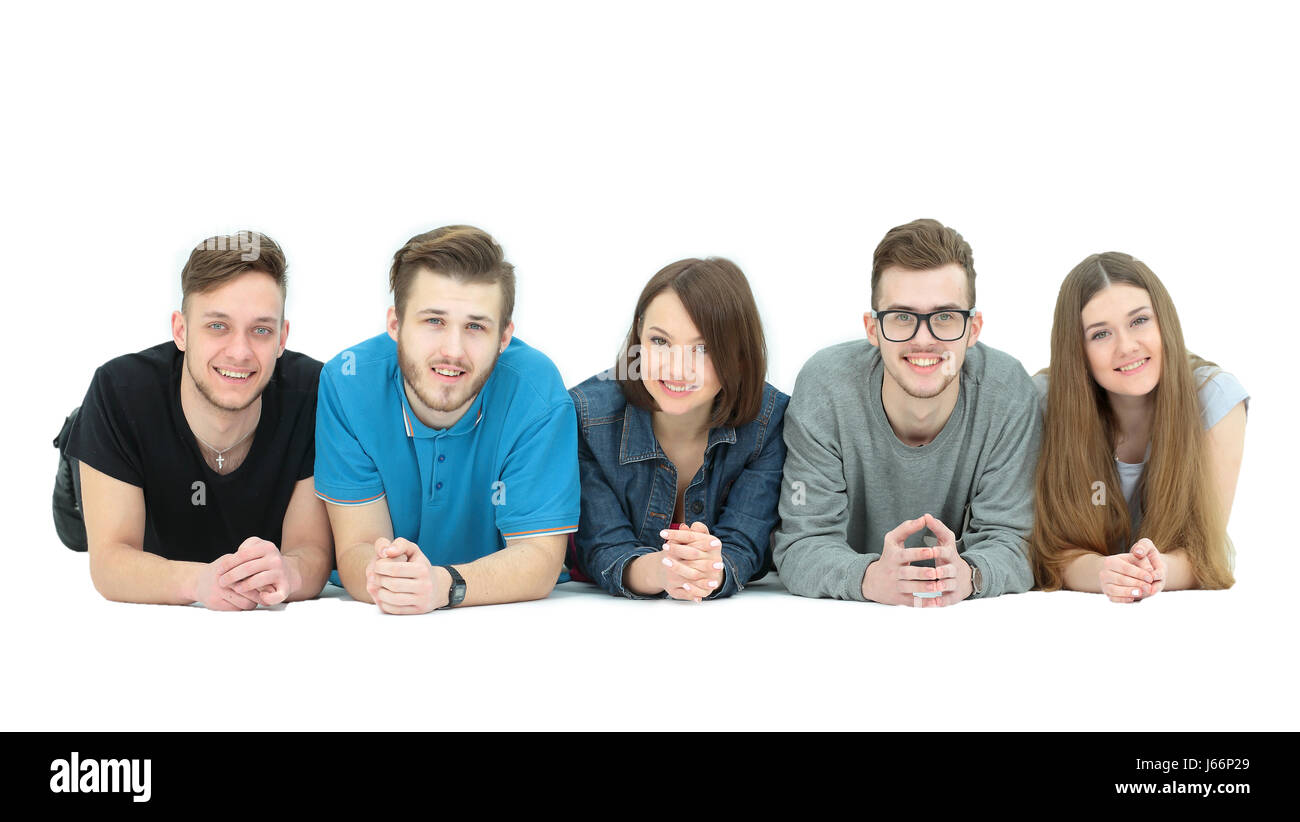

In [ ]:
from google.colab import files
from IPython.display import Image, display

# Upload image file and display it
uploaded = files.upload()
display(Image(list(uploaded.keys())[0]))



1.   Image Transformation:
2.   Load Pre-trained Model:
3.   Make Prediction:
4.   Extract Results:
5.   Filter Detections:
6.   Visualization:
7.   Print Number of Objects Detected:



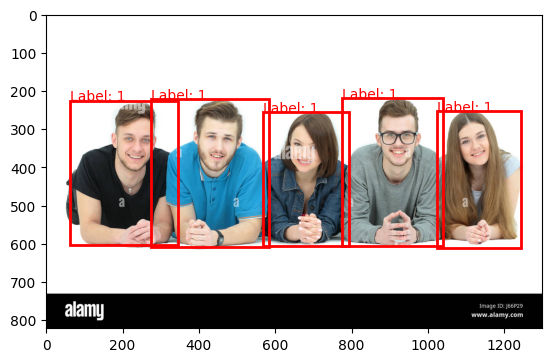

Number of objects detected: 5


In [ ]:
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = "5.jpg"
image = Image.open(image_path).convert("RGB")

# Define the transformation
transform = T.Compose([T.ToTensor()])

# Apply the transformation
image_tensor = transform(image)
image_tensor = image_tensor.unsqueeze(0)  # Add a batch dimension

# Load the pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Make a prediction
with torch.no_grad():
    prediction = model(image_tensor)

# Get bounding boxes, labels, and scores
boxes = prediction[0]['boxes'].cpu().numpy()
labels = prediction[0]['labels'].cpu().numpy()
scores = prediction[0]['scores'].cpu().numpy()

# Filter detections based on confidence threshold (adjust as needed)
confidence_threshold = 0.5
filtered_indices = scores >= confidence_threshold
boxes = boxes[filtered_indices]
labels = labels[filtered_indices]

# Plot the result
fig, ax = plt.subplots(1)
ax.imshow(image)

for box, label in zip(boxes, labels):
    x, y, w, h = box
    rect = plt.Rectangle((x, y), w - x, h - y, fill=False, color='red', linewidth=2)
    ax.add_patch(rect)
    plt.text(x, y, f'Label: {label}', color='red')

plt.show()

# Print the number of objects detected
num_objects = len(boxes)
print("Number of objects detected:", num_objects)
